In [2]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [179]:
te.login('jupyter:jupyter')

'You are logged in as a jupyter:jupyter'

# Effect of Russia-Ukraine War on their currencies

In [94]:
currency_data = te.getHistoricalData(country=['russia', 'ukraine'],  indicator='currency',  initDate='2022-01-01', endDate='2022-07-01', output_type='df')

In [95]:
currency_data['DateTime'] = pd.to_datetime(currency_data['DateTime']).dt.date
ruble = currency_data.query(f'Country == "Russia"')
uah = currency_data.query(f'Country == "Ukraine"')

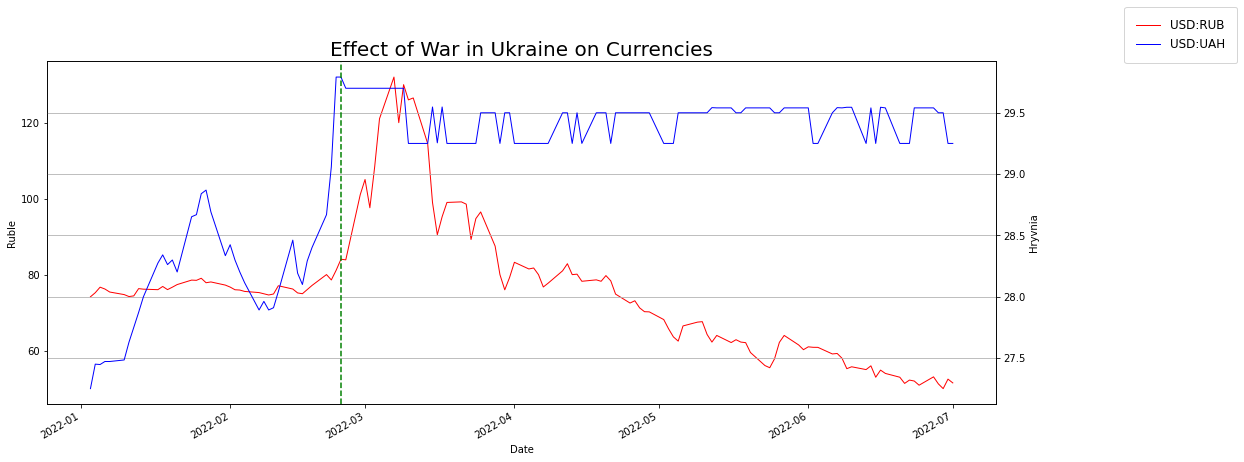

In [96]:
fig, axis_1 = plt.subplots(figsize=(17, 7))
axis_2 = axis_1.twinx()

axis_1.plot(ruble['DateTime'].values.tolist(), ruble['Value'].values.tolist(), marker='', color='red', linewidth=1, label='USD:RUB')
axis_2.plot(uah['DateTime'].values.tolist(), uah['Value'].values.tolist(), marker='', color='blue', linewidth=1, label='USD:UAH')

# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Ruble')
axis_2.set_ylabel('Hryvnia')

fig.legend(
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)

plt.grid(True)
plt.title("Effect of War in Ukraine on Currencies", size=20)
plt.gcf().autofmt_xdate()

# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='green', linestyle='--', label='War start date')

plt.show()

# Effect of Russia-Ukraine war on their exports

In [97]:
export_data = te.getHistoricalData(country=['russia', 'ukraine'],  indicator='exports',  initDate='2022-01-01', output_type='df')

In [107]:
export_data['DateTime'] = pd.to_datetime(export_data['DateTime']).dt.date
df = pd.DataFrame(columns= ['Ukraine exports', 'Russia exports'], index=export_data['DateTime'].unique())
for index, row in df.iterrows():
    try:
        df.loc[index, 'Ukraine exports'] = export_data.loc[(export_data['DateTime'] == index) & (export_data['Country'] == 'Ukraine'), 'Value'].item()
    except ValueError:
        df.loc[index, 'Ukraine exports'] = 0
    
    try:
        df.loc[index, 'Russia exports'] = export_data.loc[(export_data['DateTime'] == index) & (export_data['Country'] == 'Russia'), 'Value'].item()
    except ValueError:
        df.loc[index, 'Russia exports'] = 0

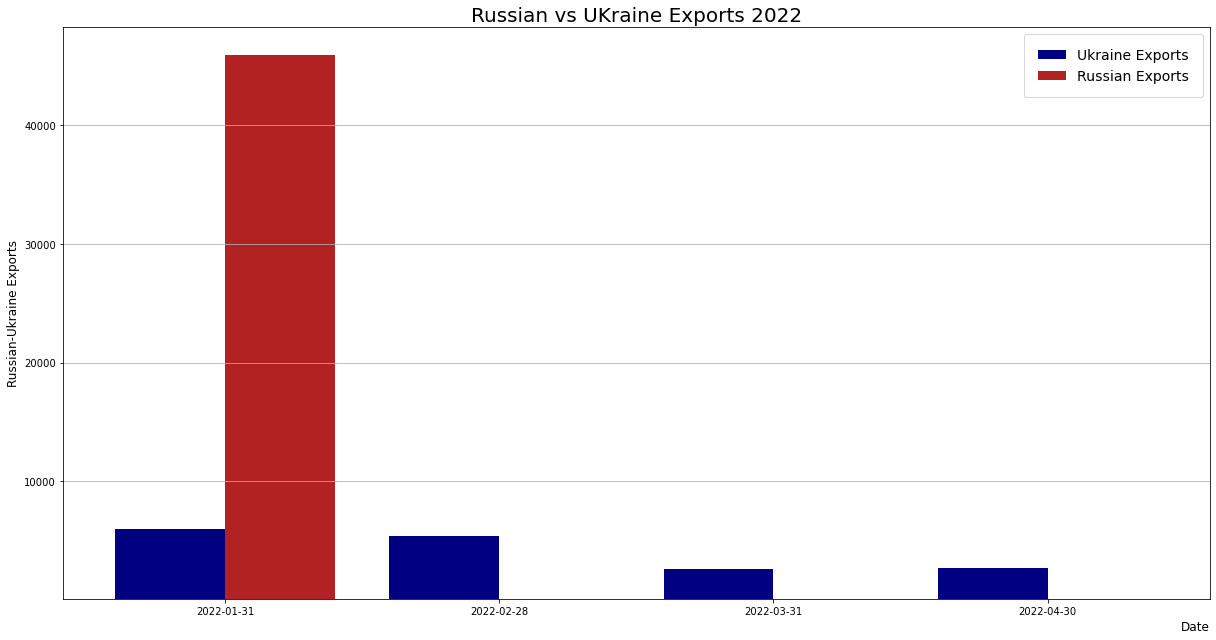

In [102]:
labels = df.index.tolist()
ukr_exp = df['Ukraine exports'].values.tolist()
rus_exp = df['Russia exports'].values.tolist()

x = np.arange(len(labels))
width = 0.40

fig, ax = plt.subplots(figsize=(17, 9))
rects1 = ax.bar(x - width/2, ukr_exp, width, label='Ukraine Exports',color='navy')
rects2 = ax.bar(x + width/2, rus_exp, width, label='Russian Exports', color='firebrick')

ax.set_xlabel('Date', loc='right', size=12)
ax.set_ylabel('Russian-Ukraine Exports', size=12)
ax.set_title('Russian vs UKraine Exports 2022', size=20)

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(fontsize=14,
          borderpad=1)

ax.set_ylim(ymin=100)

fig.tight_layout()


ax.yaxis.grid(zorder=0)
plt.show()

Since there is not enough data present, it is difficult to extract meaningful insights.

In [103]:
import_data = te.getHistoricalData(country=['russia', 'ukraine'],  indicator='imports',  initDate='2022-01-01', output_type='df')

In [104]:
import_data['DateTime'] = pd.to_datetime(export_data['DateTime']).dt.date
df = pd.DataFrame(columns= ['Ukraine imports', 'Russia imports'], index=import_data['DateTime'].unique())
for index, row in df.iterrows():
    try:
        df.loc[index, 'Ukraine imports'] = import_data.loc[(import_data['DateTime'] == index) & (import_data['Country'] == 'Ukraine'), 'Value'].item()
    except ValueError:
        df.loc[index, 'Ukraine imports'] = 0
    
    try:
        df.loc[index, 'Russia imports'] = import_data.loc[(import_data['DateTime'] == index) & (import_data['Country'] == 'Russia'), 'Value'].item()
    except ValueError:
        df.loc[index, 'Russia imports'] = 0

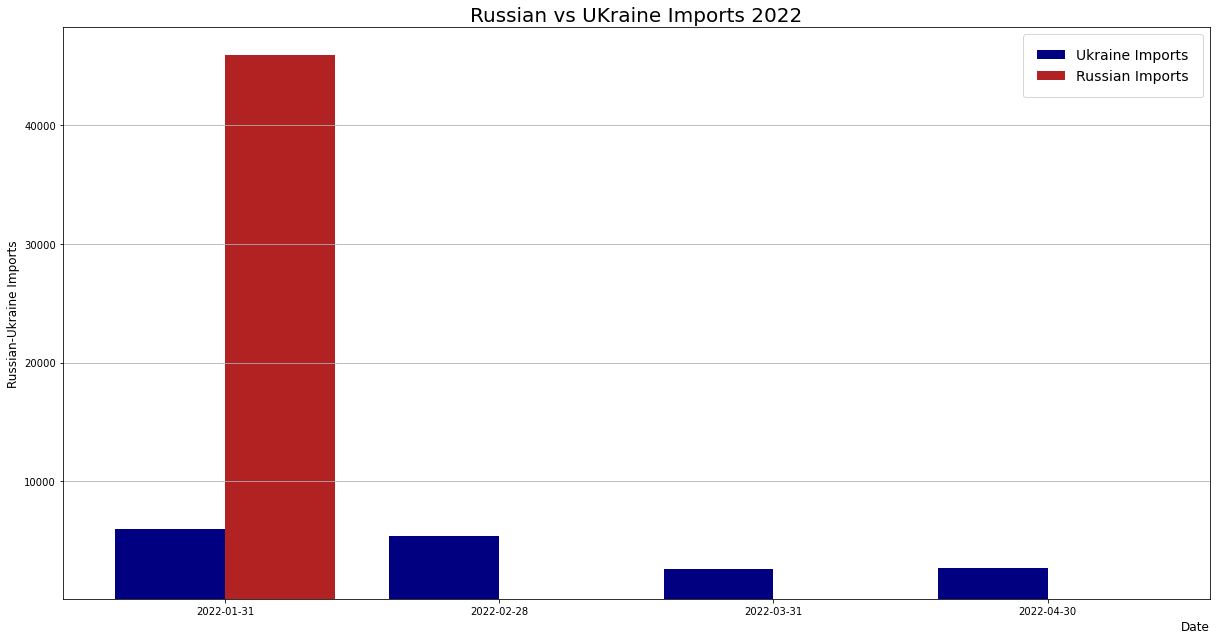

In [105]:
labels = df.index.tolist()
ukr_imp = df['Ukraine imports'].values.tolist()
rus_imp = df['Russia imports'].values.tolist()

x = np.arange(len(labels))
width = 0.40

fig, ax = plt.subplots(figsize=(17, 9))
rects1 = ax.bar(x - width/2, ukr_exp, width, label='Ukraine Imports',color='navy')
rects2 = ax.bar(x + width/2, rus_exp, width, label='Russian Imports', color='firebrick')

ax.set_xlabel('Date', loc='right', size=12)
ax.set_ylabel('Russian-Ukraine Imports', size=12)
ax.set_title('Russian vs UKraine Imports 2022', size=20)

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(fontsize=14,
          borderpad=1)

ax.set_ylim(ymin=100)

fig.tight_layout()


ax.yaxis.grid(zorder=0)
plt.show()

# Effect of Russia-Ukraine war on energy commodities

Russia's biggest exports:
* Crude Oil
* Gas
* Coal
* Wheat
* Iron
* Nickel
* Cobalt

In [109]:
commodities = {
    'XB1:COM': 'Gasoline',
    'NG1:COM': 'Natural Gas',
    'CL1:COM': 'Crude Oil'
}

In [110]:
# collect data for 2022
raw_df_22 = te.getHistorical(symbol=list(commodities.keys()), initDate='2022-01-01', output_type='df')

In [111]:
df_22 = pd.DataFrame()
df_22.index.name = 'Date'

for item in commodities:
    comm_data =  raw_df_22.loc[raw_df_22['Symbol'] == item]
    comm_closing_data = comm_data[['Date', 'Close']].rename(columns={'Close': commodities[item]})
    
    comm_closing_data.set_index('Date', inplace=True)
    comm_closing_data.index = pd.to_datetime(comm_closing_data.index, infer_datetime_format=True)
    df_22 = pd.merge(df_22, comm_closing_data, on='Date', how='outer')


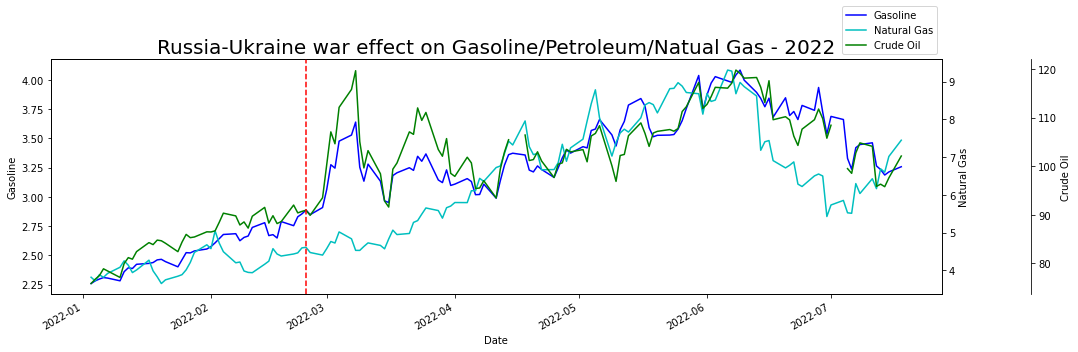

In [112]:
from helper import plot_multi
ax = plot_multi(df_22, figsize=(15, 5))
ax.set_title('Russia-Ukraine war effect on Gasoline/Petroleum/Natual Gas - 2022', color='black', size=20)
# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='red', linestyle='--')
plt.tight_layout()


In [113]:
# 2021 data
raw_df_21 = te.getHistorical(symbol=list(commodities.keys()), initDate='2021-01-01', endDate='2021-07-14', output_type='df')

In [114]:
df_21= pd.DataFrame()
df_21.index.name = 'Date'

for item in commodities:
    comm_data =  raw_df_21.loc[raw_df_21['Symbol'] == item]
    comm_closing_data = comm_data[['Date', 'Close']].rename(columns={'Close': commodities[item]})
    
    comm_closing_data.set_index('Date', inplace=True)
    comm_closing_data.index = pd.to_datetime(comm_closing_data.index, infer_datetime_format=True)
    df_21 = pd.merge(df_21, comm_closing_data, on='Date', how='outer')


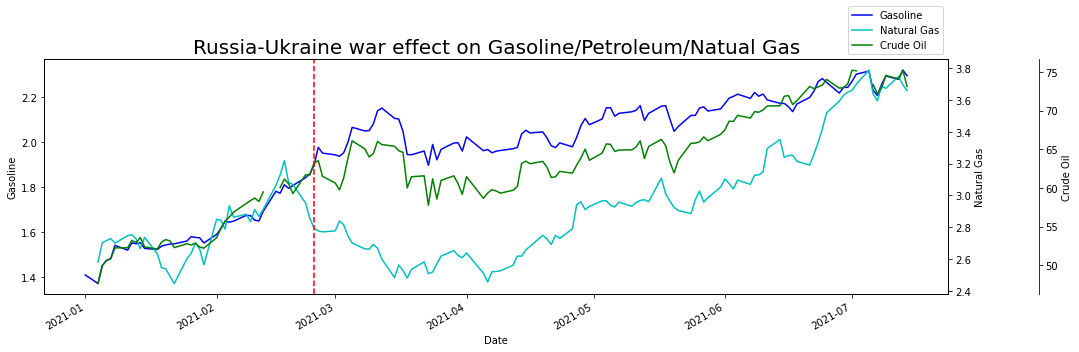

In [115]:
from helper import plot_multi
ax = plot_multi(df_21, figsize=(15, 5))
ax.set_title('Russia-Ukraine war effect on Gasoline/Petroleum/Natual Gas', color='black', size=20)
# start date of the war
plt.axvline(dt.datetime(2021, 2, 24), color='red', linestyle='--')
plt.tight_layout()

# Number of cars registered in Russia

In [168]:
russ_car_reg = te.getHistoricalByTicker(ticker = 'RUSSIACARREG', start_date = '2021-02-01', output_type='df')

In [169]:
russ_car_reg['DateTime'] = pd.to_datetime(russ_car_reg['DateTime'])

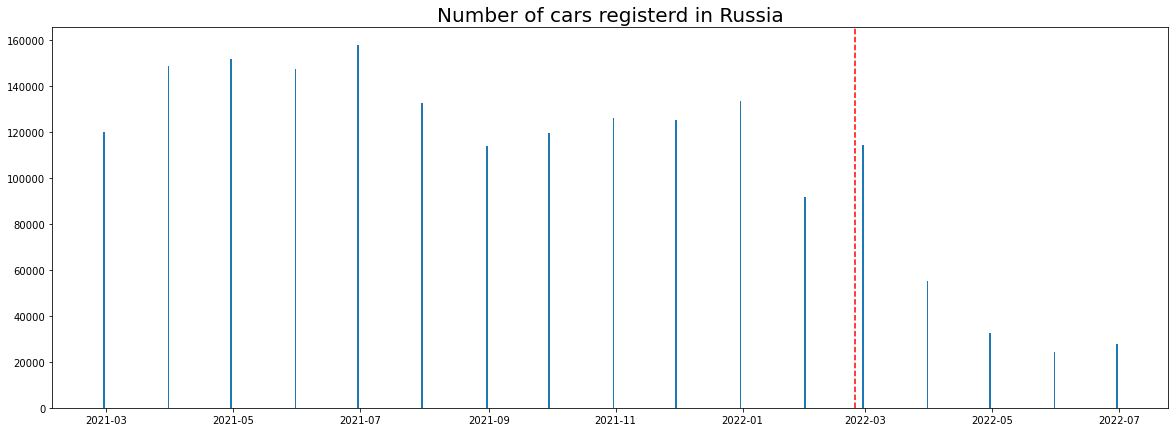

In [171]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(russ_car_reg['DateTime'], russ_car_reg['Value'])
ax.set_title('Number of cars registerd in Russia', color='black', size=20)
plt.axvline(dt.datetime(2022, 2, 24), color='red', linestyle='--')

plt.show()